In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Process:
    def __init__(self, init_0=0, dx=1, process_var=1):
        self.dx = dx
        self.std = np.sqrt(process_var)
        self.data = np.array([init_0])
        self.noised_data = np.array([self.data[0] + np.random.randn() * self.std])
        
    def get_mes(self):
        self.data = np.concatenate([self.data, np.array([self.data[-1] + self.dx])])
        self.noised_data = np.concatenate([self.noised_data, np.array([self.data[-1] + np.random.randn() * self.std])])
        return self.noised_data[-1]

In [3]:
class KF_1D:
    def __init__(self, Q=1, R=1, x=0, P=1):
        self.R = R
        self.Q = Q
        self.x = x
        self.P = P
        
    #predict step
    def predict(self, estimate, P):
        
        prior_mean = estimate + dx
        prior_cov = P + self.Q
        return prior_mean, prior_cov
    
    #update step
    def update(self, prediction, P, z):
        y = z - prediction
        K = P / (P + self.R)
        estimate = prediction + K * y
        P *=(1 - K)
        
        return estimate, P

    #filter output
    def __call__(self, mes):
        self.x, self.P = self.predict(self.x, self.P)
        self.x, self.P = self.update(self.x, self.P, mes)

        return self.x

In [34]:
#parameters
x0 = 0
P = 1
dx = 1
Q = 0.1
R = 9
size = 100

process = Process(init_0=x0, dx=dx, process_var=1.5*R)
kf = KF_1D()
filter = []
filter.append(x0)

t = np.linspace(0, size, size + 1)
for i in t[1:]:
    mes = process.get_mes()
    filter.append(kf(mes))

In [36]:
filter = np.array([filter])
mean_sq_filter = ((filter - process.data)**2).mean()
mean_sq_noise = ((process.noised_data - process.data)**2).mean()


print("filter_error: " + str(mean_sq_filter) + " pure_error: " + str(mean_sq_noise))

filter_error: 6.445225374768028 pure_error: 13.662836949233665


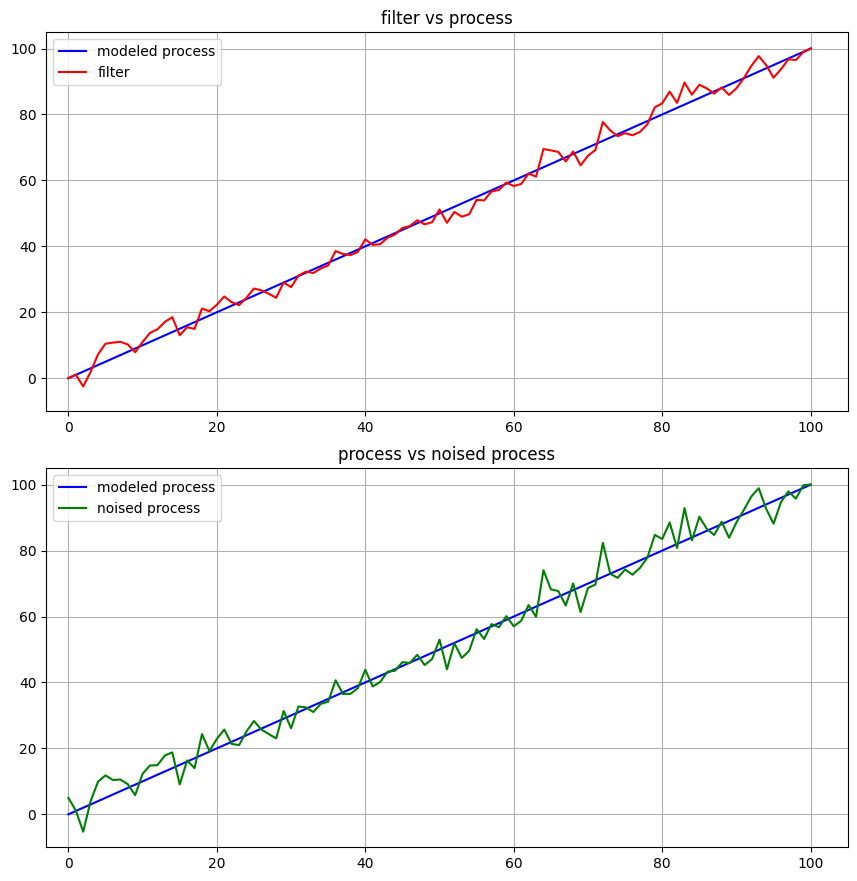

In [35]:
fig, (ax1, ax2) = plt.subplots(2)

fig.set_size_inches(9, 9)
fig.tight_layout(pad=2)

ax1.plot(t, process.data, c='b', label='modeled process', ms=3)
#ax1.errorbar(t, filter, yerr=3, c='r', label='filter', fmt= '.',ecolor = 'lightgreen', elinewidth = 1, capsize=5, ms=3)
ax1.plot(t, filter, c='r', label='filter', ms=3)
ax1.set_title("filter vs process")
ax1.set_xlim(-3, size+5)
ax1.set_ylim(-10, size+5)
ax1.grid()
ax1.legend()


ax2.plot(t, process.data, c='b', label='modeled process', ms=3)
ax2.plot(t, process.noised_data, c='g', label='noised process', ms=3)
#ax2.errorbar(t, process.noised_data, yerr=3, c='g', label='filter', fmt= '.',ecolor = 'lightgreen', elinewidth = 1, capsize=5, ms=3)
ax2.set_title("process vs noised process")
ax2.set_xlim(-3, size+5)
ax2.set_ylim(-10, size+5)
ax2.grid()
ax2.legend()
plt.savefig("res.png")

plt.show()